# Pi System Size & HOMO/LUMO Gap Analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# Load Data
df = pd.read_csv('../data/master_pi_gap_data.csv')

In [3]:
df.tail()

,ID,alpha_GFN2(A^3),gap_GFN2(eV),alpha_DFT(A^3),gap_DFT(eV),pi_sys_size
8459,114_344_000100,242.934347,0.560685,374.328177,5.320533,113
8460,1175_67_010101,246.577641,0.290727,420.328366,4.183097,106
8461,410_658_001000,256.029135,0.666259,392.290344,5.994614,115
8462,867_397_111011,259.184933,0.592853,432.635864,5.481080,155
8463,379_282_000100,260.776229,0.866182,464.997122,5.421488,118


In [4]:
df.head()

,ID,alpha_GFN2(A^3),gap_GFN2(eV),alpha_DFT(A^3),gap_DFT(eV),pi_sys_size
0,124,11.274520,2.3803,10.409453,9.099215,5
1,1221,16.539030,2.6280,15.744607,9.541672,6
2,1388,20.955424,2.8424,21.192579,8.929688,8
3,2487,35.628089,3.0975,36.028071,9.178672,7
4,3433,25.075641,3.3523,24.997229,8.825741,11


### Method Definition

In [5]:
'''
    Calculates root mean square error

    Parameters
    ---------
    predictions: ndarray of floats
        expected values [based on best fit line]
    observations: ndarray of floats
        observed values
    
    Returns
    -------
    rmse: float
        root mean square error
'''
def calc_rmse(predictions, observations):
    rmse = np.sqrt(((predictions - observations) ** 2).mean())
    return rmse

In [6]:
'''
    Performs linear regression on data set and calculates associated values

    Parameters
    ---------
    x: ndarray of floats
        x values
    y: ndarray of floats
        y values
    intercept: boolean
        if true, calculates y intercept, if false sets y intercept to 0 (forces fit)
    
    Returns
    -------
    lin_regress_var: list of floats
        slope, y-intercept, r^2, root mean square error
'''

def perform_lin_regress(x, y, intercept=True):  
     
    # 2D X array necessary for sklearn
    xi = x.reshape((-1,1))

    model = LinearRegression(fit_intercept = intercept)
    model.fit(xi,y)
    
    slope = model.coef_[0]
    intercept = model.intercept_
    r_squared = model.score(xi,y)

    # calculate RMSE
    y_pred = y
    y_true = []
    for val in x: 
        y_tr = slope*val + intercept
        y_true.append(y_tr)
    y_true = np.array(y_true)

    rmse = calc_rmse(y_pred, y_true)
    
    lin_regress_var = [slope, intercept, r_squared, rmse]
    
    return lin_regress_var

In [7]:
# matplotlib global formatting

SMALL_SIZE = 8
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

plt.rcParams['figure.dpi'] = 300

### HOMO/LUMO Gap Analysis

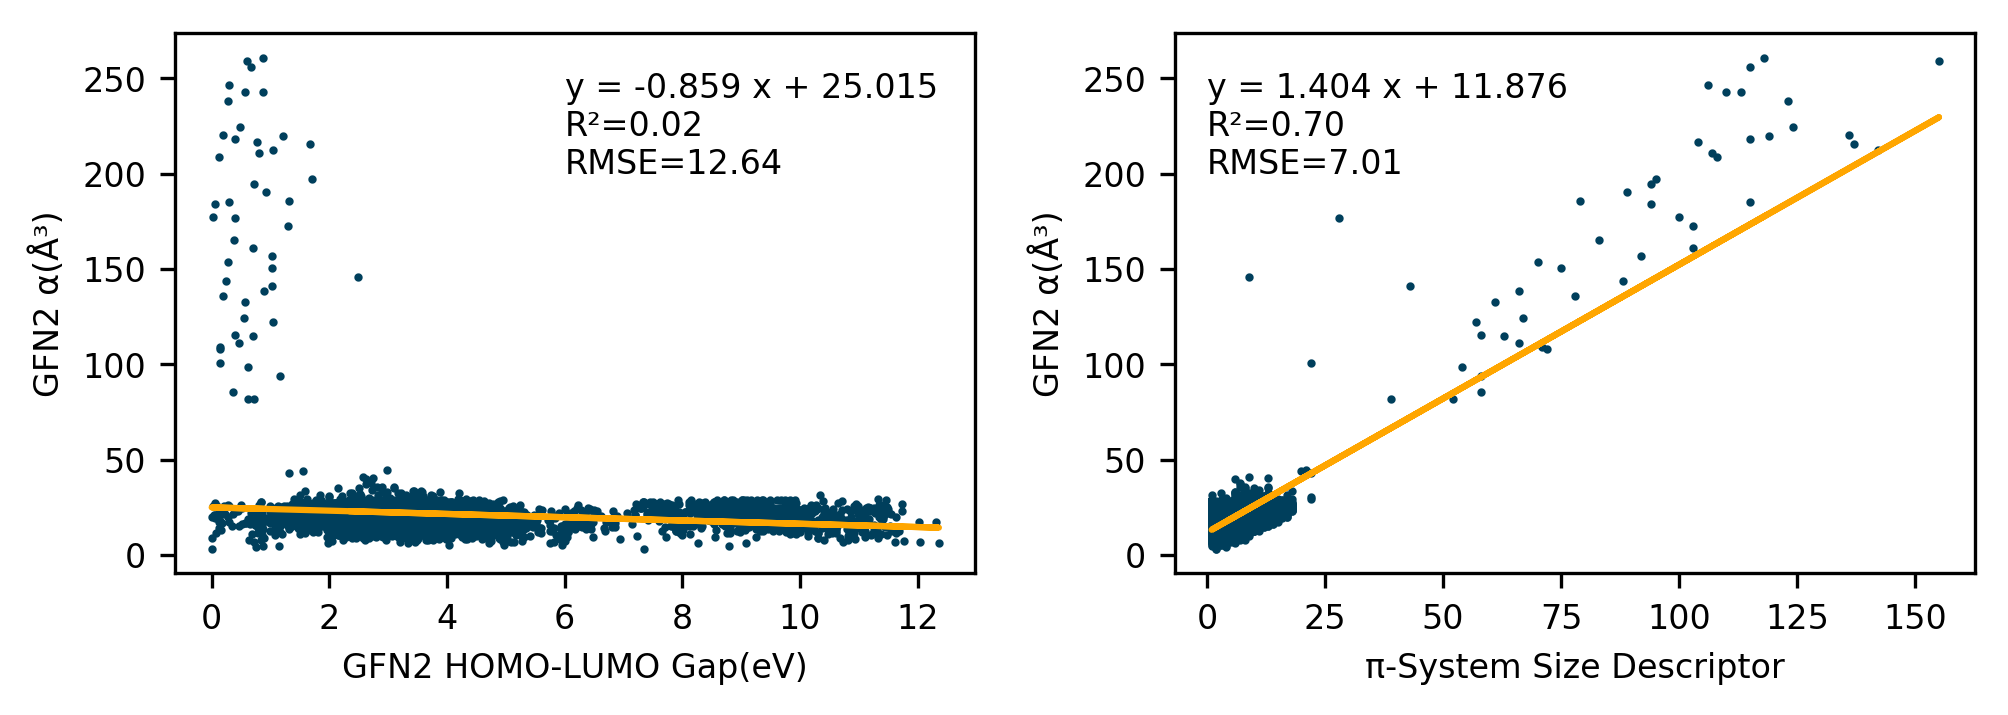

In [8]:
# set up subplot figure
fig, axs = plt.subplots(1, 2)
top = 0.45
bottom = 0
left = 0
right = 1
plt.subplots_adjust(top=top, bottom=bottom, left=left, right=right, wspace=0.25)


# SUBPLOT 0: HOMO-LUMO Gaps
x = df['gap_GFN2(eV)'].values
y = df['alpha_GFN2(A^3)'].values

# axs[0].set(ylim=(-0.5,16.5), xlim=(-0.5,10.5))
# axs[0].set_xlabel('GFN2 α(Å³)')
# axs[0].set_ylabel('ωB97XD cc-pVTZ α(Å³)')
# axs[0].set_xticks([0,2,4,6,8,10])
# axs[0].set_yticks([0,4,8,12,16])

# label axes
axs[0].set_xlabel('GFN2 HOMO-LUMO Gap(eV)')
axs[0].set_ylabel('GFN2 α(Å³)')

# perform linear regression
slope, intercept, r_squared, rmserror = perform_lin_regress(x, y, True)

# plot points & regression line
axs[0].scatter(x, y, s=1, c='#003f5c')
axs[0].plot(x, slope*x+intercept, c='#ffa600')

# print regression line equation & r-squared
if intercept < 0:
    y_int = '- %.3f' % abs(intercept)
else: 
    y_int = '+ %.3f' % intercept
axs[0].text(6, 200, 'y = %.3f x %s\nR²=%.2f\nRMSE=%.2f' % (slope, y_int, r_squared, rmserror))


# SUBPLOT 1: Pi-System Size
x = df['pi_sys_size'].values
y = df['alpha_GFN2(A^3)'].values

# axs[0].set(ylim=(-0.5,16.5), xlim=(-0.5,10.5))
# axs[0].set_xlabel('GFN2 α(Å³)')
# axs[0].set_ylabel('ωB97XD cc-pVTZ α(Å³)')
# axs[0].set_xticks([0,2,4,6,8,10])
# axs[0].set_yticks([0,4,8,12,16])

# label axes
axs[1].set_xlabel('π-System Size Descriptor')
axs[1].set_ylabel('GFN2 α(Å³)')

# perform linear regression
slope, intercept, r_squared, rmserror = perform_lin_regress(x, y, True)

# plot points & regression line
axs[1].scatter(x, y, s=1, c='#003f5c')
axs[1].plot(x, slope*x+intercept, c='#ffa600')

# print regression line equation & r-squared
if intercept < 0:
    y_int = '- %.3f' % abs(intercept)
else: 
    y_int = '+ %.3f' % intercept
axs[1].text(0, 200, 'y = %.3f x %s\nR²=%.2f\nRMSE=%.2f' % (slope, y_int, r_squared, rmserror))

# plt.savefig('gaps_and_pi.png', transparent=False, bbox_inches='tight')

plt.show()